# Splitting, averaging and background-subtracting images

In [6]:
# data_dir = r'C:\Users\sg2119\OneDrive - Imperial College London\Y4\MSci Project\OPT Shared files'
# data_dir = r'H:\data_store'
data_dir = '../../data_store/'
bg_dir = data_dir + '/2023-01-17 background images'
img_dir = data_dir + '/2023-01-17 edge redone'

In [7]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import cv2

In [8]:
img_path = img_dir + '/2023-01-17 edge in water f-a'

In [9]:
def load_stack(path, x_min=400, x_max=700, y_min=300, y_max=600, show=False):
    imgs = io.imread(path+'/MMStack_Pos0.ome.tif')[:, x_min:x_max, y_min:y_max]
    if show:
        plt.imshow(imgs[0], cmap="gray")
        plt.title(f'Image 1 of {len(imgs)}')
        plt.show()
    print(f"Loaded stack of {imgs.shape[0]} images, dimensions {imgs.shape[1:]}")
    return imgs

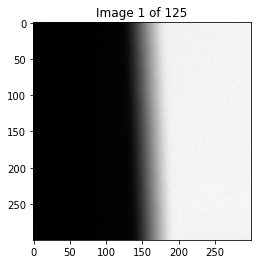

Loaded stack of 125 images, dimensions (300, 300)


In [10]:
imgs =  load_stack(img_path, show=True)

In [11]:
def average_stack(imgs, im_per_pos=5, show=False):
    # adapted from: https://stackoverflow.com/a/69721142
    image_sets = imgs.reshape((len(imgs)//im_per_pos, im_per_pos, imgs.shape[1], imgs.shape[2]))
    avg_stack = np.mean(image_sets, axis=1)
    if show:
        plt.imshow(avg_stack[0], cmap="gray")
        plt.title(f'Image 1 of {len(avg_stack)}')
        plt.show()
    print(f"Averaged original stack of {len(imgs)} down to {len(avg_stack)}.")
    return avg_stack

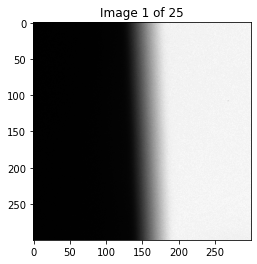

Averaged original stack of 125 down to 25.


In [12]:
avg_stack = average_stack(imgs, show=True)

In [13]:
def remove_background(imgs, bg_light, bg_dark, show=False):
    # adapted from: https://stackoverflow.com/a/73082666
    imgs_minus_bg = np.clip(imgs - bg_dark, 0, imgs.max())
    light_minus_bg = np.clip(bg_light - bg_dark, 0, bg_light.max())
    divided = np.clip(imgs_minus_bg / light_minus_bg, 0, imgs_minus_bg.max())
    if show:
        f, axes = plt.subplots(2, 2, figsize=(10, 10))
        axes[0][0].imshow(imgs[0], cmap="gray")
        axes[0][0].set_title(f"imgs, 1 of {len(imgs)}")
        axes[0][1].imshow(imgs_minus_bg[0], cmap="gray")
        axes[0][1].set_title(f"imgs_minus_bg, 1 of {len(imgs_minus_bg)}")
        axes[1][0].imshow(light_minus_bg[0], cmap="gray")
        axes[1][0].set_title(f"light_minus_bg, 1 of {len(light_minus_bg)}")
        axes[1][1].imshow(divided[0], cmap="gray")
        axes[1][1].set_title(f"divided, 1 of {len(divided)}")
        plt.tight_layout()
        plt.show()
    print(f"Removed background and divided illumination from {len(divided)} images.")
    return divided

In [14]:
bg_light_path = bg_dir + '/2023-01-17 bg light f-a'
bg_dark_path = bg_dir + '/2023-01-17 bg dark f-a'
bg_light = average_stack(load_stack(bg_light_path))
bg_dark = average_stack(load_stack(bg_dark_path))

Loaded stack of 5 images, dimensions (300, 300)
Averaged original stack of 5 down to 1.
Loaded stack of 5 images, dimensions (300, 300)
Averaged original stack of 5 down to 1.


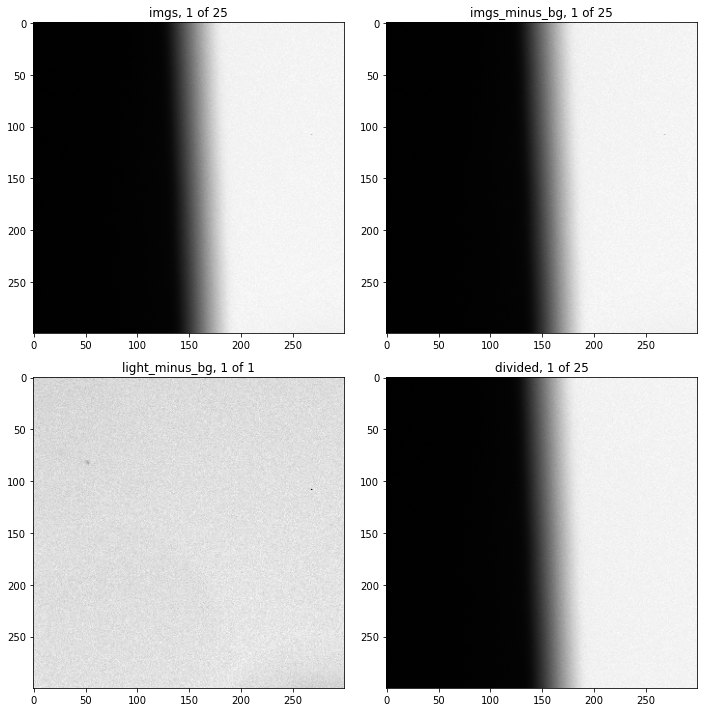

Removed background and divided illumination from 25 images.


In [15]:
divided = remove_background(avg_stack, bg_light, bg_dark, show=True)